In [363]:
# Import Libraries
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sci-kit learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv("loan.csv")

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [364]:
data['occupation'].value_counts()

occupation
Engineer        5
Analyst         2
Chef            2
Writer          2
Banker          2
Receptionist    2
Teacher         2
Professor       2
Designer        2
Marketing       2
Salesman        2
Architect       2
Consultant      2
Doctor          2
IT              2
Artist          2
Lawyer          2
Nurse           2
Accountant      2
Manager         2
Photographer    1
Server          1
Psychologist    1
Software        1
Musician        1
Dentist         1
Programmer      1
Editor          1
Pilot           1
Realtor         1
Electrician     1
HR              1
Sales           1
Veterinarian    1
Researcher      1
Pharmacist      1
Student         1
Stylist         1
Name: count, dtype: int64

In [365]:
# Drop occupation column
data = data.drop(['occupation'], axis=1)

In [366]:
data['education_level'].value_counts()

education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64

In [367]:
# Encode ordinal categorical values
label_mapping = {
    "High School": 0,
    "Associate's": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "Doctoral": 4
}
data['education_level'] = data['education_level'].map(label_mapping)

label_mapping = {"Approved": 1, "Denied": 0}
data['loan_status'] = data['loan_status'].map(label_mapping)

# Encode other categorical values
categorical_columns = ['gender', 'marital_status']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [368]:
data.head()

,age,education_level,income,credit_score,loan_status,gender_Male,marital_status_Single
0,32,2,85000,720,1,True,False
1,45,3,62000,680,1,False,True
2,28,0,25000,590,0,True,True
3,51,2,105000,780,1,False,False
4,36,2,75000,710,1,True,False


In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    61 non-null     int64
 1   education_level        61 non-null     int64
 2   income                 61 non-null     int64
 3   credit_score           61 non-null     int64
 4   loan_status            61 non-null     int64
 5   gender_Male            61 non-null     bool 
 6   marital_status_Single  61 non-null     bool 
dtypes: bool(2), int64(5)
memory usage: 2.6 KB


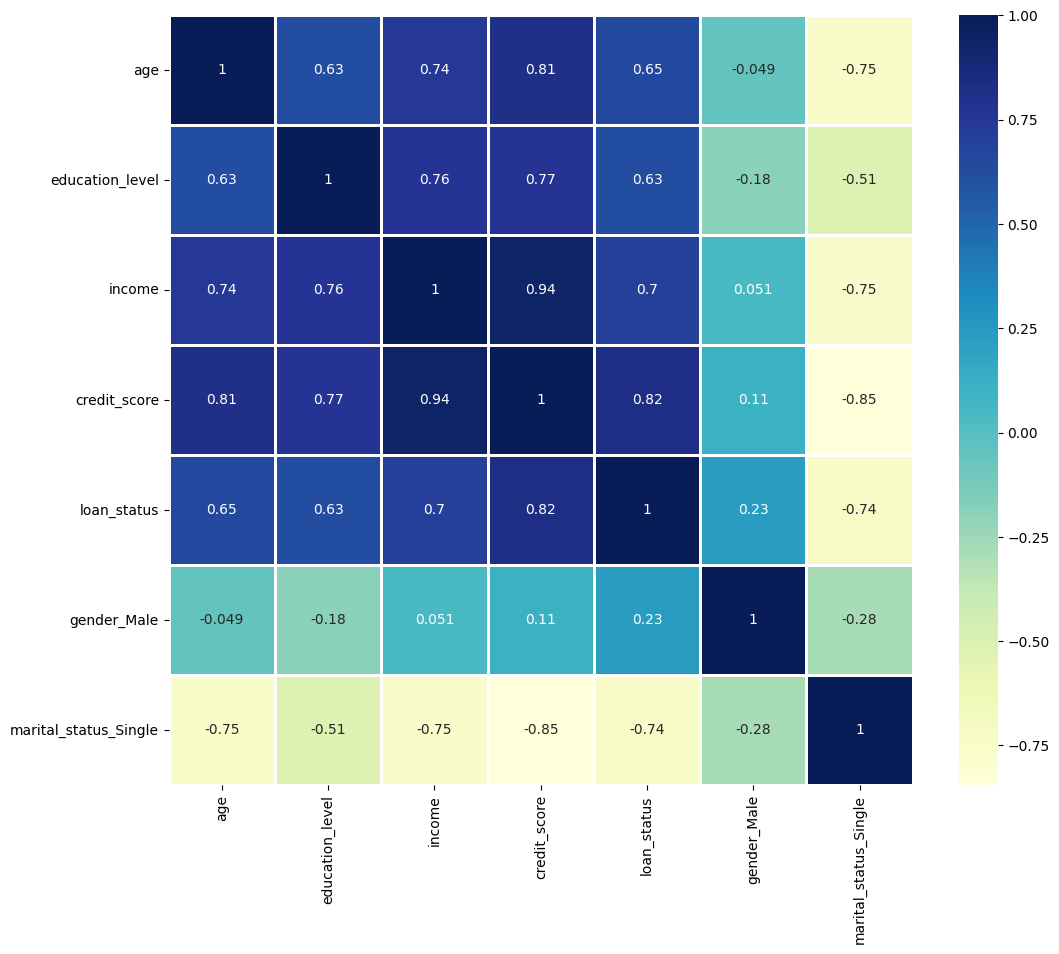

In [370]:
# Plot the heatmap to visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=2)
plt.show()

In [371]:
# Splitting the dataset into features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler_multiple = StandardScaler()
X_train_scaled = scaler_multiple.fit_transform(X_train)
X_test_scaled = scaler_multiple.transform(X_test)

In [372]:
# Initialize the Logistic regression model
log_reg_multiple = LogisticRegression()

# Fit the logistic regression model
log_reg_multiple.fit(X_train_scaled, y_train)

# Predict the model
y_pred = log_reg_multiple.predict(X_test_scaled)

Accuracy Score: 0.9230769230769231
Confusion Matrix: 
 [[4 1]
 [0 8]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.89      1.00      0.94         8

    accuracy                           0.92        13
   macro avg       0.94      0.90      0.92        13
weighted avg       0.93      0.92      0.92        13



<Figure size 800x600 with 0 Axes>

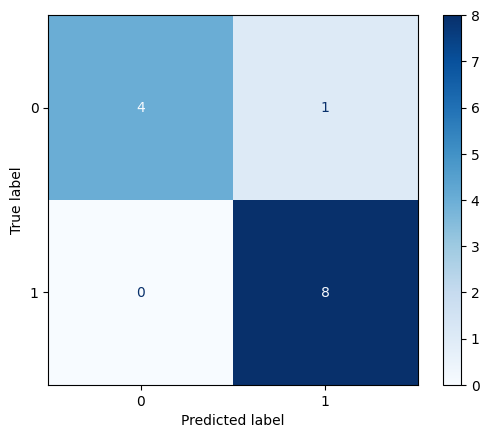

In [373]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
print("Classification Report: \n", classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test, labels=log_reg_multiple.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_multiple.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.show()

In [374]:
# Load the dataset
data = pd.read_csv("loan.csv")

In [375]:
# Encode the target variable
label_mapping = {"Approved": 1, "Denied": 0}
data['loan_status'] = data['loan_status'].map(label_mapping)

In [376]:
# Select only the credit score feature and the target variable
X = data[['credit_score']]
y = data['loan_status']

In [377]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [378]:
# Normalize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [379]:
# Initialize the Logistic regression model
log_reg = LogisticRegression()

# Fit the logistic regression model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [380]:
# Predict the model
y_pred = log_reg.predict(X_test_scaled)

In [381]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_pred, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))
print("Classification Report:\n", classification_report(y_pred, y_test))

Accuracy Score: 0.9230769230769231
Confusion Matrix:
 [[4 1]
 [0 8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.89      1.00      0.94         8

    accuracy                           0.92        13
   macro avg       0.94      0.90      0.92        13
weighted avg       0.93      0.92      0.92        13



<Figure size 800x600 with 0 Axes>

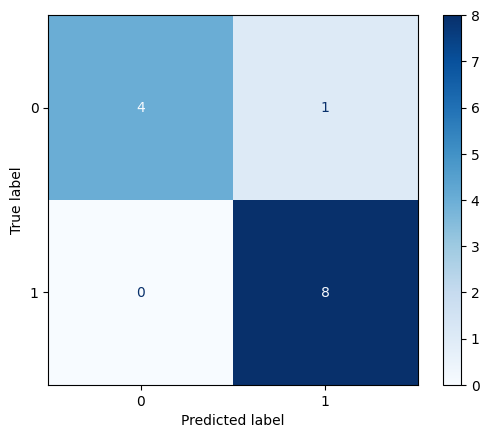

In [382]:
cm = confusion_matrix(y_pred, y_test, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.show()

In [383]:
import warnings
warnings.filterwarnings('ignore')

In [384]:
# Predict loan approval for the following inputs:
# age: 30, education_level: Bachelor's, income: 60000, credit_score: 700, gender_Male: 1, marital_status_Single: 0
input_data = [[30, 2, 60000, 500, 1, 0]]
input_data_scaled = scaler_multiple.transform(input_data)
prediction_multi_features = log_reg_multiple.predict(input_data_scaled)

print("\nPrediction with Multiple Features Model:")
if prediction_multi_features[0] == 1:
    print("Loan Approved")
else:
    print("Loan Denied")


Prediction with Multiple Features Model:
Loan Denied


In [385]:
# Predict loan approval for a credit score of 700
credit_score_input = [[500]]
credit_score_input_scaled = scaler.transform(credit_score_input)
prediction_credit_score = log_reg.predict(credit_score_input_scaled)

print("Prediction with Credit Score Model:")
if prediction_credit_score[0] == 1:
    print("Loan Approved")
else:
    print("Loan Denied")

Prediction with Credit Score Model:
Loan Denied
